# Data Exploration - Titans Finance Transaction Dataset

This notebook provides a comprehensive exploratory data analysis of the Titans Finance transaction dataset. We'll examine data structure, distributions, patterns, and quality issues.

## Objectives:
- Understand dataset structure and basic statistics
- Analyze transaction patterns and distributions
- Identify data quality issues
- Generate key insights for modeling

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configure visualization settings
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 1. Data Loading and Initial Inspection

In [3]:
# Load the transaction data
data_path = '../../data/all_transactions.csv'
df = pd.read_csv(data_path)

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names and Types:")
print(df.dtypes)
print("\nFirst few rows:")
df.head(10)

Dataset Shape: (124, 9)

Column Names and Types:
Date               object
Type               object
Description        object
Amount            float64
Category           object
Payment Method     object
Status             object
Reference          object
Receipt URL        object
dtype: object

First few rows:


,Date,Type,Description,Amount,Category,Payment Method,Status,Reference,Receipt URL
0,2024-12-06,Income,Femi Oladele - Self Project,3567.18,NaN,NaN,received,NaN,NaN
1,2024-12-06,Expense,Neptune HX99G/HX100G,-1295.83,computer_equipment,loan,paid,Minisforum,https://tmsappstorage.blob.core.windows.net/re...
2,2024-12-10,Expense,BC Company Registration,-351.50,professional_fees,loan,paid,BC Registry Services,https://tmsappstorage.blob.core.windows.net/re...
3,2024-12-12,Expense,Business Registration Consultation,-169.50,professional_fees,loan,paid,Prabh Gulati CPA Professional Corp,https://tmsappstorage.blob.core.windows.net/re...
4,2024-12-22,Expense,Ethernet Unmanaged Switch,-175.49,hardware,loan,paid,Newegg,https://tmsappstorage.blob.core.windows.net/re...
5,2024-12-28,Expense,Telus Mobility,-132.38,telephone,loan,paid,Telus,https://tmsappstorage.blob.core.windows.net/re...
6,2024-12-28,Expense,Workspace Paint,-36.20,maintenance,loan,pending,Home Depot,NaN
7,2024-12-31,Expense,Claude AI Pro,-28.00,software,loan,paid,Anthropic,https://tmsappstorage.blob.core.windows.net/re...
8,2024-12-31,Expense,Meals & Eatouts (Dec 2024),-141.91,food,loan,paid,NaN,NaN
9,2024-12-31,Expense,Business Use of Home Expenses (Dec 2024),-1009.32,home_office,loan,paid,NaN,NaN


In [4]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Display data info after conversion
print("Data Types after conversion:")
print(df.dtypes)
print("\nDataset Info:")
df.info()

Data Types after conversion:
Date              datetime64[ns]
Type                      object
Description               object
Amount                   float64
Category                  object
Payment Method            object
Status                    object
Reference                 object
Receipt URL               object
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            124 non-null    datetime64[ns]
 1   Type            124 non-null    object        
 2   Description     124 non-null    object        
 3   Amount          124 non-null    float64       
 4   Category        109 non-null    object        
 5   Payment Method  109 non-null    object        
 6   Status          124 non-null    object        
 7   Reference       108 non-null    object        
 8   Receipt URL     

## 2. Data Quality Assessment

Missing Values Analysis:
                Missing Count  Percentage
Category                   15   12.096774
Payment Method             15   12.096774
Reference                  16   12.903226
Receipt URL                49   39.516129


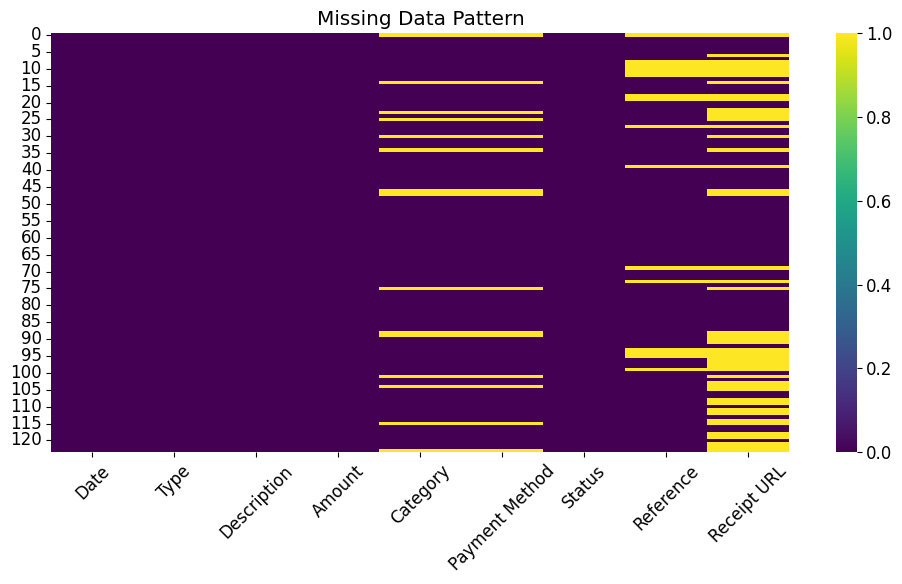

In [5]:
# Check for missing values
print("Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Data Pattern')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Check for duplicate records
print(f"Total rows: {len(df)}")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Check for unique values in key columns
print("\nUnique value counts:")
for col in ['Type', 'Category', 'Payment Method', 'Status']:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"Values: {df[col].unique()}")
    print()

Total rows: 124
Duplicate rows: 0

Unique value counts:
Type: 2 unique values
Values: ['Income' 'Expense']

Category: 22 unique values
Values: [nan 'computer_equipment' 'professional_fees' 'hardware' 'telephone'
 'maintenance' 'software' 'food' 'home_office' 'entertainment' 'travel'
 'vehicle_expenses' 'rent' 'training' 'office_supplies' 'furniture'
 'other' 'vehicle' 'supplies' 'bad_debts' 'fuel' 'meals_entertainment'
 'repairs']

Payment Method: 4 unique values
Values: [nan 'loan' 'credit_card' 'bank_transfer' 'debit_card']

Status: 3 unique values
Values: ['received' 'paid' 'pending']



## 3. Transaction Amount Analysis

In [7]:
# Basic statistics for amount
print("Transaction Amount Statistics:")
print(df['Amount'].describe())

# Separate income and expense analysis
income_df = df[df['Type'] == 'Income']
expense_df = df[df['Type'] == 'Expense']

print(f"\nIncome transactions: {len(income_df)} ({len(income_df)/len(df)*100:.1f}%)")
print(f"Expense transactions: {len(expense_df)} ({len(expense_df)/len(df)*100:.1f}%)")

print("\nIncome Amount Statistics:")
print(income_df['Amount'].describe())

print("\nExpense Amount Statistics (absolute values):")
print(expense_df['Amount'].abs().describe())

Transaction Amount Statistics:
count      124.000000
mean       539.513790
std       2903.547502
min     -14115.000000
25%       -154.447500
50%        -55.815000
75%        -22.622500
max       9040.000000
Name: Amount, dtype: float64

Income transactions: 15 (12.1%)
Expense transactions: 109 (87.9%)

Income Amount Statistics:
count      15.000000
mean     7168.478667
std      2179.276112
min      3567.180000
25%      4520.000000
50%      8136.000000
75%      9040.000000
max      9040.000000
Name: Amount, dtype: float64

Expense Amount Statistics (absolute values):
count      109.000000
mean       372.729083
std       1429.247715
min          8.790000
25%         28.000000
50%         66.810000
75%        217.030000
max      14115.000000
Name: Amount, dtype: float64


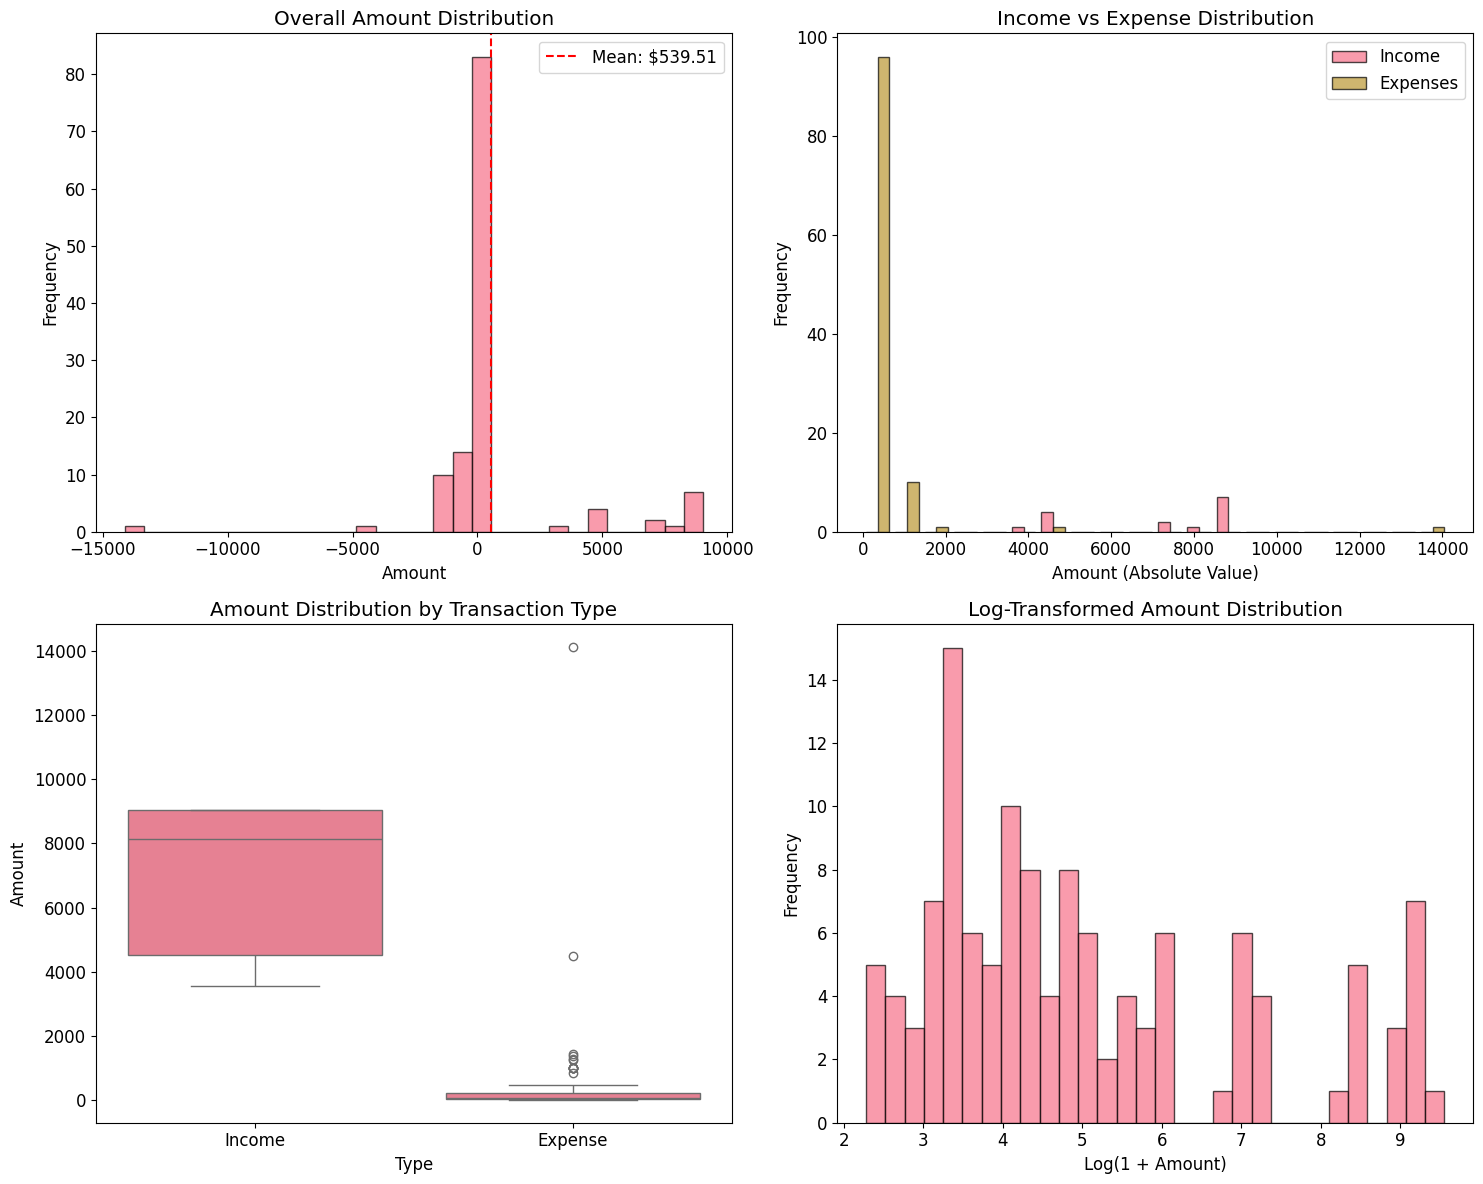

In [8]:
# Visualize amount distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Overall amount distribution
axes[0, 0].hist(df['Amount'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Overall Amount Distribution')
axes[0, 0].set_xlabel('Amount')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Amount'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Amount"].mean():.2f}')
axes[0, 0].legend()

# Income vs Expense amounts
axes[0, 1].hist([income_df['Amount'], expense_df['Amount'].abs()], 
                bins=20, label=['Income', 'Expenses'], alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Income vs Expense Distribution')
axes[0, 1].set_xlabel('Amount (Absolute Value)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Box plot for amounts by type
df_plot = df.copy()
df_plot.loc[df_plot['Type'] == 'Expense', 'Amount'] = df_plot.loc[df_plot['Type'] == 'Expense', 'Amount'].abs()
sns.boxplot(data=df_plot, x='Type', y='Amount', ax=axes[1, 0])
axes[1, 0].set_title('Amount Distribution by Transaction Type')

# Log scale distribution for better visualization
axes[1, 1].hist(np.log1p(df['Amount'].abs()), bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Log-Transformed Amount Distribution')
axes[1, 1].set_xlabel('Log(1 + Amount)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 4. Temporal Analysis

In [9]:
# Date range analysis
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total days: {(df['Date'].max() - df['Date'].min()).days}")

# Create time-based features for analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6])

# Monthly transaction analysis
monthly_stats = df.groupby(['Year', 'Month']).agg({
    'Amount': ['count', 'sum', 'mean'],
    'Type': lambda x: (x == 'Income').sum()
}).round(2)
monthly_stats.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Income_Count']
monthly_stats['Expense_Count'] = monthly_stats['Transaction_Count'] - monthly_stats['Income_Count']
print("\nMonthly Transaction Summary:")
print(monthly_stats)

Date range: 2024-12-06 00:00:00 to 2025-07-29 00:00:00
Total days: 235

Monthly Transaction Summary:
            Transaction_Count  Total_Amount  Avg_Amount  Income_Count  \
Year Month                                                              
2024 12                    12         -0.00       -0.00             1   
2025 1                      8       6826.63      853.33             1   
     2                      8      16703.13     2087.89             2   
     3                     12      15345.66     1278.80             2   
     4                     33       -596.11      -18.06             2   
     5                     29       4915.16      169.49             4   
     6                     16      15289.60      955.60             2   
     7                      6       8415.64     1402.61             1   

            Expense_Count  
Year Month                 
2024 12                11  
2025 1                  7  
     2                  6  
     3                 10  


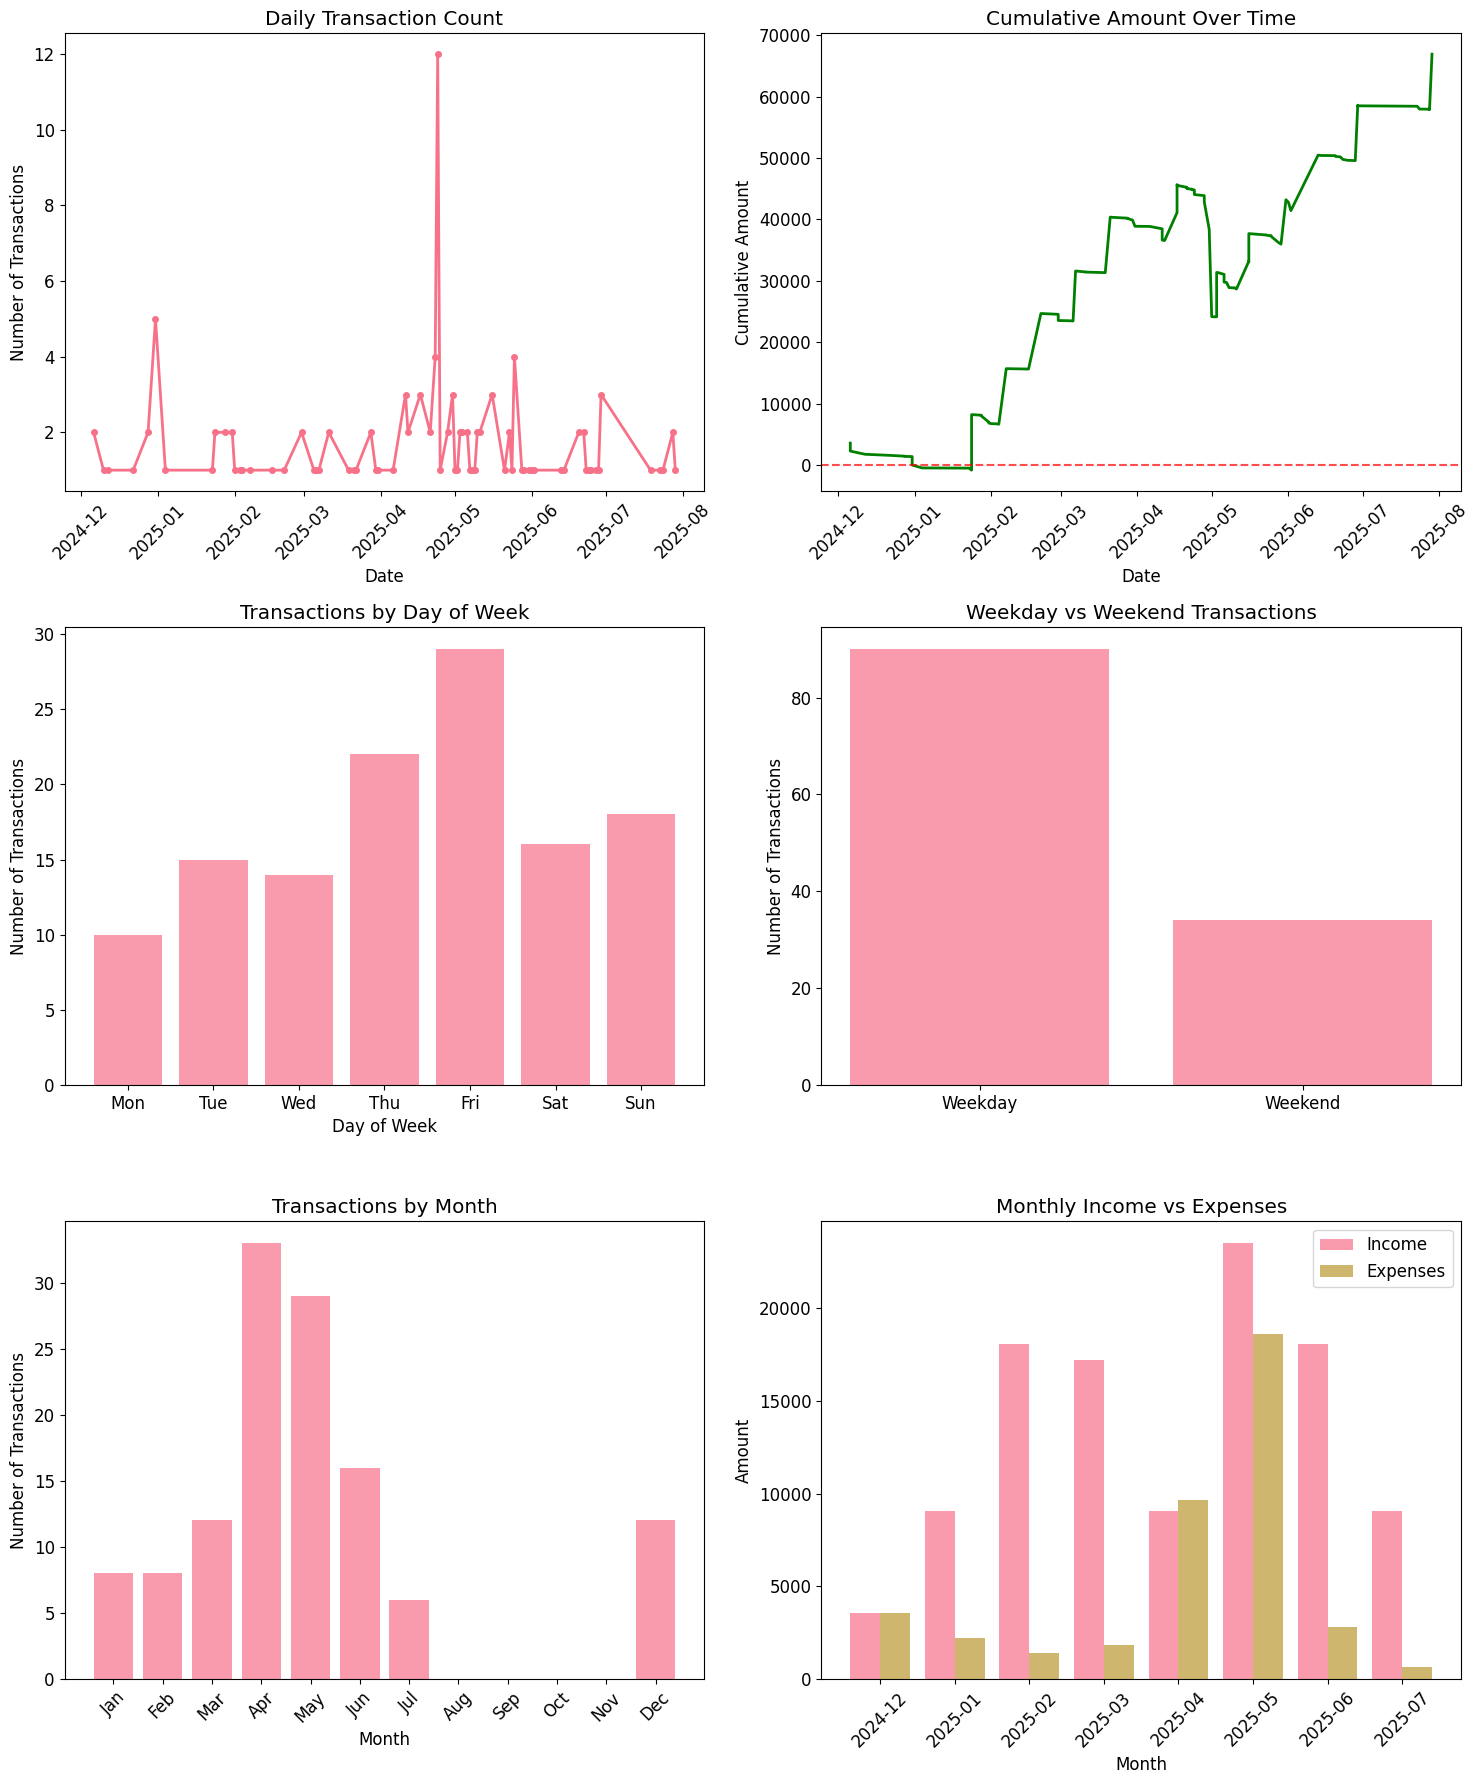

In [10]:
# Visualize temporal patterns
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Transactions over time
daily_transactions = df.groupby('Date').size()
axes[0, 0].plot(daily_transactions.index, daily_transactions.values, marker='o', linewidth=2, markersize=4)
axes[0, 0].set_title('Daily Transaction Count')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Transactions')
axes[0, 0].tick_params(axis='x', rotation=45)

# Cumulative amount over time
df_sorted = df.sort_values('Date')
df_sorted['Cumulative_Amount'] = df_sorted['Amount'].cumsum()
axes[0, 1].plot(df_sorted['Date'], df_sorted['Cumulative_Amount'], linewidth=2, color='green')
axes[0, 1].set_title('Cumulative Amount Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Cumulative Amount')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Day of week analysis
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_counts = df['DayOfWeek'].value_counts().sort_index()
axes[1, 0].bar(range(7), dow_counts.values, tick_label=day_names, alpha=0.7)
axes[1, 0].set_title('Transactions by Day of Week')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Number of Transactions')

# Weekend vs weekday analysis
weekend_stats = df.groupby('IsWeekend').agg({
    'Amount': ['count', 'mean', 'sum']
}).round(2)
weekend_stats.columns = ['Count', 'Mean_Amount', 'Total_Amount']
weekend_labels = ['Weekday', 'Weekend']
axes[1, 1].bar(weekend_labels, weekend_stats['Count'], alpha=0.7)
axes[1, 1].set_title('Weekday vs Weekend Transactions')
axes[1, 1].set_ylabel('Number of Transactions')

# Monthly trend
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_counts = df['Month'].value_counts().sort_index()
axes[2, 0].bar(range(1, 13), [monthly_counts.get(i, 0) for i in range(1, 13)], 
               tick_label=[month_names[i-1] for i in range(1, 13)], alpha=0.7)
axes[2, 0].set_title('Transactions by Month')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Number of Transactions')
axes[2, 0].tick_params(axis='x', rotation=45)

# Income vs Expense over time (monthly)
monthly_type = df.groupby(['Year', 'Month', 'Type'])['Amount'].sum().unstack(fill_value=0)
if 'Income' in monthly_type.columns and 'Expense' in monthly_type.columns:
    x_pos = range(len(monthly_type))
    axes[2, 1].bar(x_pos, monthly_type['Income'], alpha=0.7, label='Income', width=0.4)
    axes[2, 1].bar([x + 0.4 for x in x_pos], monthly_type['Expense'].abs(), alpha=0.7, label='Expenses', width=0.4)
    axes[2, 1].set_title('Monthly Income vs Expenses')
    axes[2, 1].set_xlabel('Month')
    axes[2, 1].set_ylabel('Amount')
    axes[2, 1].legend()
    axes[2, 1].set_xticks([x + 0.2 for x in x_pos])
    axes[2, 1].set_xticklabels([f"{int(idx[0])}-{int(idx[1]):02d}" for idx in monthly_type.index], rotation=45)

plt.tight_layout()
plt.show()

## 5. Category Analysis

In [11]:
# Category distribution analysis
print("Category Analysis:")
category_stats = df.groupby('Category').agg({
    'Amount': ['count', 'sum', 'mean', 'std'],
    'Type': lambda x: (x == 'Income').sum()
}).round(2)
category_stats.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Std_Amount', 'Income_Count']
category_stats['Expense_Count'] = category_stats['Transaction_Count'] - category_stats['Income_Count']
category_stats = category_stats.sort_values('Total_Amount', key=abs, ascending=False)
print(category_stats)

# Category frequency
print("\nTop Categories by Transaction Count:")
print(df['Category'].value_counts().head(10))

Category Analysis:
                     Transaction_Count  Total_Amount  Avg_Amount  Std_Amount  \
Category                                                                       
other                                1     -14115.00   -14115.00         NaN   
furniture                            3      -5741.16    -1913.72     2250.51   
home_office                          5      -5046.60    -1009.32        0.00   
computer_equipment                   3      -2972.28     -990.76      672.25   
hardware                             6      -2540.24     -423.37      429.26   
travel                              34      -2432.41      -71.54       82.85   
bad_debts                            1      -1365.38    -1365.38         NaN   
telephone                            6      -1072.94     -178.82      113.76   
rent                                 1      -1009.32    -1009.32         NaN   
maintenance                          4       -660.66     -165.16      151.27   
professional_fees    

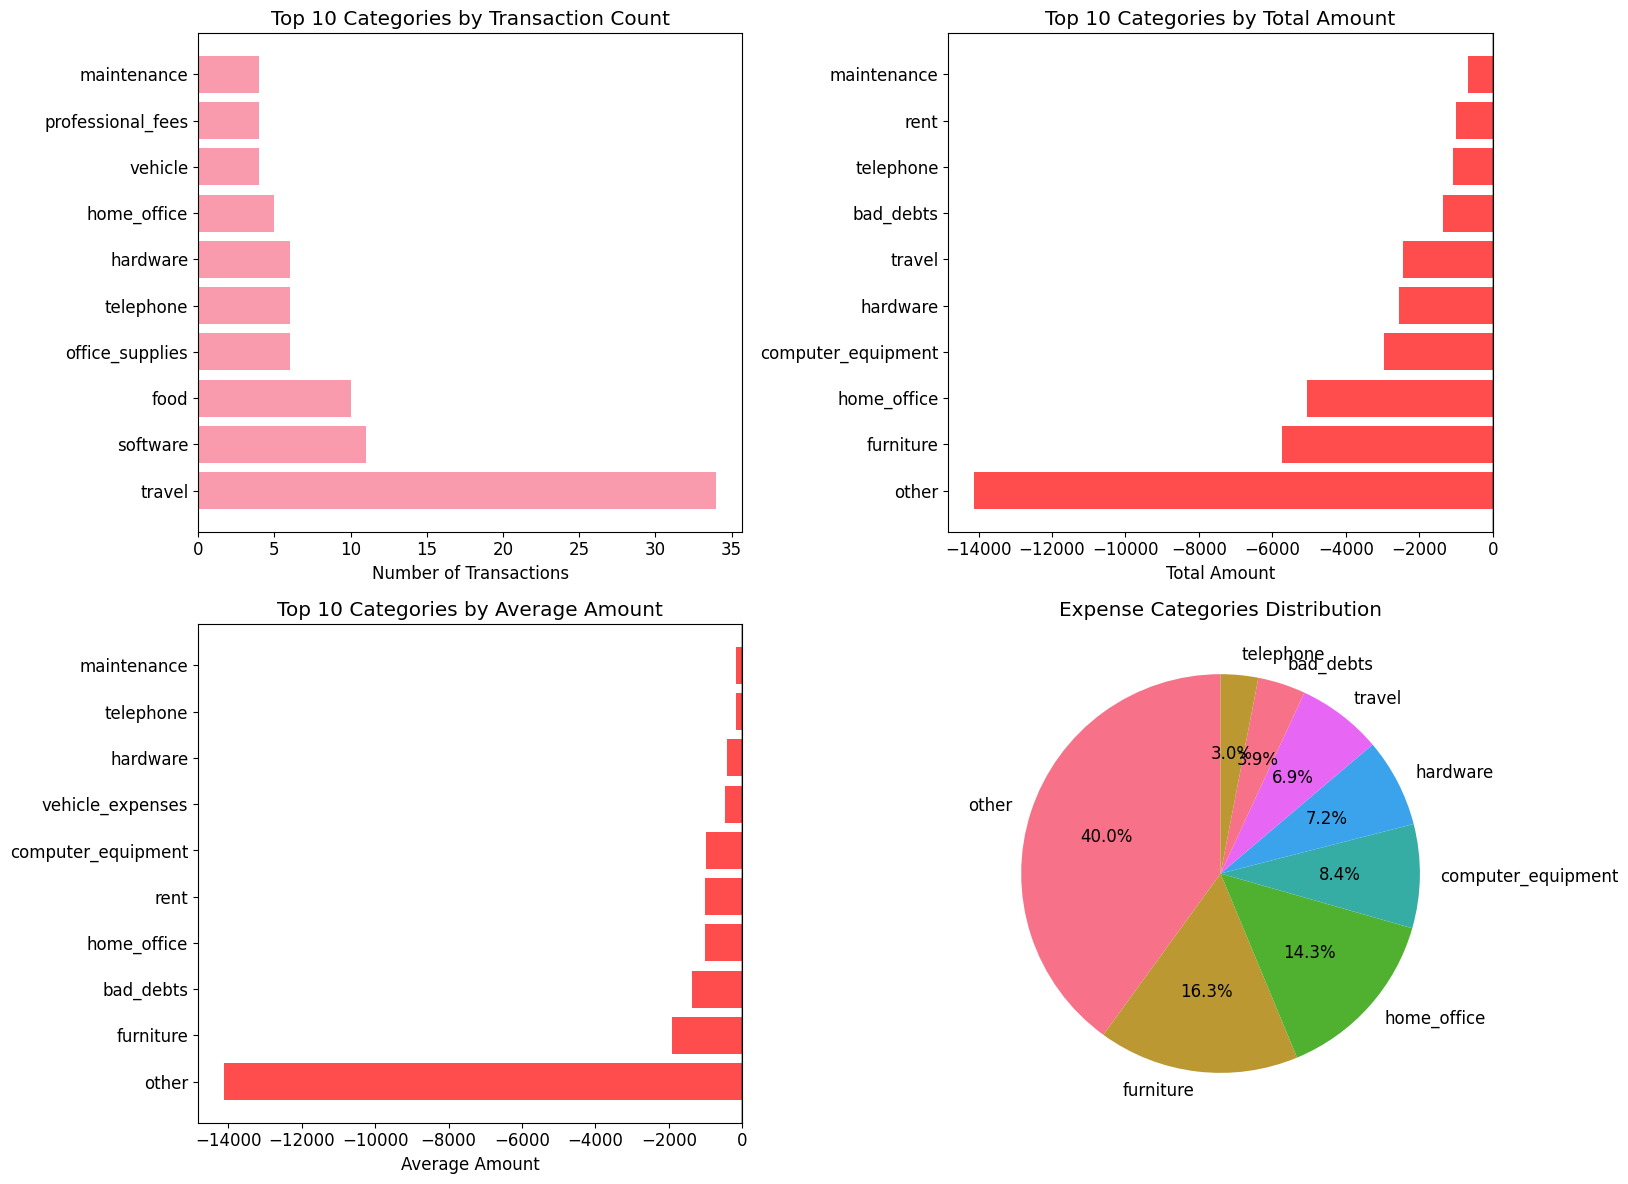

In [12]:
# Visualize category patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Category frequency
top_categories = df['Category'].value_counts().head(10)
axes[0, 0].barh(range(len(top_categories)), top_categories.values, alpha=0.7)
axes[0, 0].set_yticks(range(len(top_categories)))
axes[0, 0].set_yticklabels(top_categories.index)
axes[0, 0].set_title('Top 10 Categories by Transaction Count')
axes[0, 0].set_xlabel('Number of Transactions')

# Category total spending
category_totals = df.groupby('Category')['Amount'].sum().sort_values(key=abs, ascending=False).head(10)
colors = ['green' if x > 0 else 'red' for x in category_totals.values]
axes[0, 1].barh(range(len(category_totals)), category_totals.values, alpha=0.7, color=colors)
axes[0, 1].set_yticks(range(len(category_totals)))
axes[0, 1].set_yticklabels(category_totals.index)
axes[0, 1].set_title('Top 10 Categories by Total Amount')
axes[0, 1].set_xlabel('Total Amount')
axes[0, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Average amount by category
category_avg = df.groupby('Category')['Amount'].mean().sort_values(key=abs, ascending=False).head(10)
colors = ['green' if x > 0 else 'red' for x in category_avg.values]
axes[1, 0].barh(range(len(category_avg)), category_avg.values, alpha=0.7, color=colors)
axes[1, 0].set_yticks(range(len(category_avg)))
axes[1, 0].set_yticklabels(category_avg.index)
axes[1, 0].set_title('Top 10 Categories by Average Amount')
axes[1, 0].set_xlabel('Average Amount')
axes[1, 0].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Category distribution pie chart
expense_categories = df[df['Type'] == 'Expense'].groupby('Category')['Amount'].sum().abs().sort_values(ascending=False).head(8)
axes[1, 1].pie(expense_categories.values, labels=expense_categories.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Expense Categories Distribution')

plt.tight_layout()
plt.show()

## 6. Payment Method Analysis

Payment Method Analysis:
                Transaction_Count  Total_Amount  Avg_Amount  Income_Count  \
Payment Method                                                              
bank_transfer                  12     -26938.67    -2244.89             0   
credit_card                    45      -8376.95     -186.15             0   
debit_card                     41      -1744.67      -42.55             0   
loan                           11      -3567.18     -324.29             0   

                Expense_Count  
Payment Method                 
bank_transfer              12  
credit_card                45  
debit_card                 41  
loan                       11  


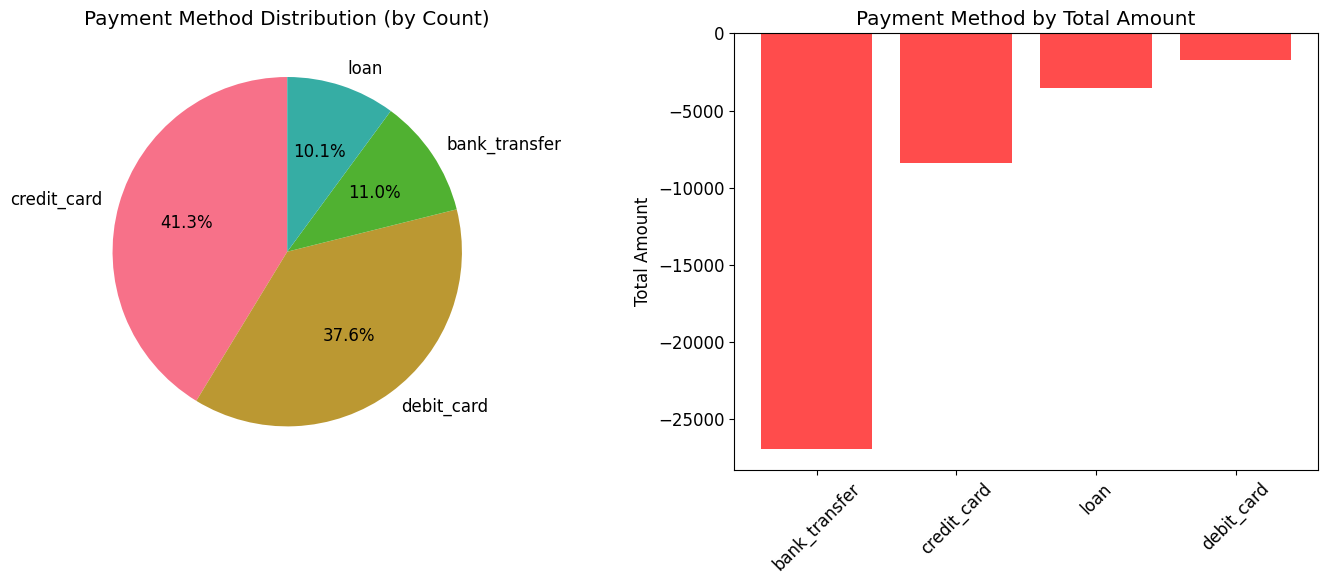

In [13]:
# Payment method analysis
print("Payment Method Analysis:")
payment_stats = df.groupby('Payment Method').agg({
    'Amount': ['count', 'sum', 'mean'],
    'Type': lambda x: (x == 'Income').sum()
}).round(2)
payment_stats.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Income_Count']
payment_stats['Expense_Count'] = payment_stats['Transaction_Count'] - payment_stats['Income_Count']
print(payment_stats)

# Visualize payment methods
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Payment method frequency
payment_counts = df['Payment Method'].value_counts()
axes[0].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Payment Method Distribution (by Count)')

# Payment method by total amount
payment_amounts = df.groupby('Payment Method')['Amount'].sum().sort_values(key=abs, ascending=False)
colors = ['green' if x > 0 else 'red' for x in payment_amounts.values]
axes[1].bar(range(len(payment_amounts)), payment_amounts.values, alpha=0.7, color=colors)
axes[1].set_xticks(range(len(payment_amounts)))
axes[1].set_xticklabels(payment_amounts.index, rotation=45)
axes[1].set_title('Payment Method by Total Amount')
axes[1].set_ylabel('Total Amount')
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Transaction Status Analysis

Transaction Status Analysis:
          Transaction_Count  Total_Amount  Avg_Amount  Income_Count  \
Status                                                                
paid                     99     -39870.56     -402.73             0   
pending                  10       -756.91      -75.69             0   
received                 15     107527.18     7168.48            15   

          Expense_Count  
Status                   
paid                 99  
pending              10  
received              0  


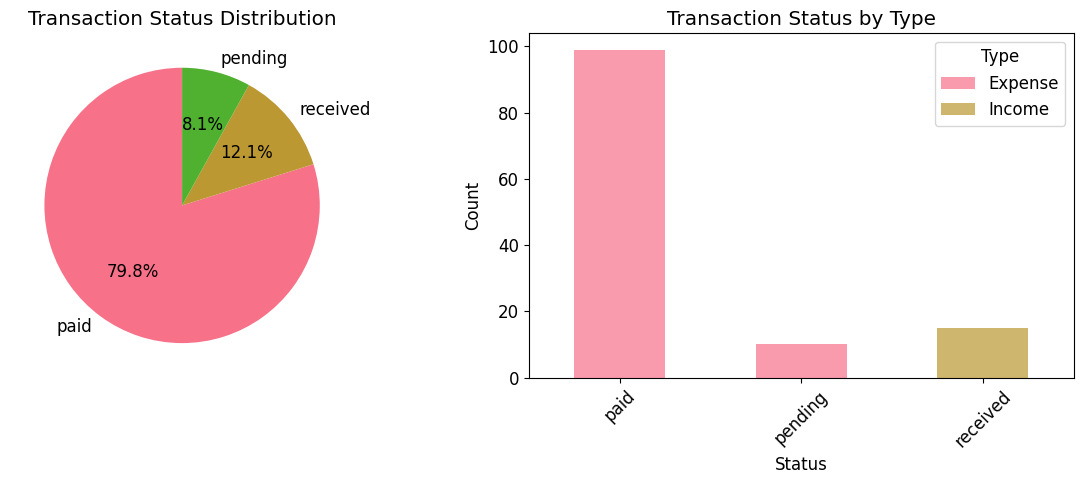

In [14]:
# Status analysis
print("Transaction Status Analysis:")
status_stats = df.groupby('Status').agg({
    'Amount': ['count', 'sum', 'mean'],
    'Type': lambda x: (x == 'Income').sum()
}).round(2)
status_stats.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Income_Count']
status_stats['Expense_Count'] = status_stats['Transaction_Count'] - status_stats['Income_Count']
print(status_stats)

# Status distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

status_counts = df['Status'].value_counts()
axes[0].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Transaction Status Distribution')

# Status by type
status_type = pd.crosstab(df['Status'], df['Type'])
status_type.plot(kind='bar', stacked=True, ax=axes[1], alpha=0.7)
axes[1].set_title('Transaction Status by Type')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Count')
axes[1].legend(title='Type')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Outlier Detection

Number of outlier transactions: 27
Percentage of outliers: 21.8%

Outlier transactions:
          Date     Type                                 Description    Amount  \
73  2025-05-01  Expense                         Loan (Femi Oladele) -14115.00   
23  2025-02-07   Income                  SearchLabs - Interac Konek   9040.00   
25  2025-02-21   Income                  SearchLabs - Interac Konek   9040.00   
34  2025-03-21   Income                  SearchLabs - Interac Konek   9040.00   
123 2025-07-29   Income                  SearchLabs - Interac Konek   9040.00   
104 2025-06-13   Income                  SearchLabs - Interac Konek   9040.00   
14  2025-01-24   Income                  SearchLabs - Interac Konek   9040.00   
115 2025-06-29   Income                  SearchLabs - Interac Konek   9040.00   
30  2025-03-07   Income                  SearchLabs - Interac Konek   8136.00   
75  2025-05-03   Income                  SearchLabs - Interac Konek   7232.00   
101 2025-05-31   Inco

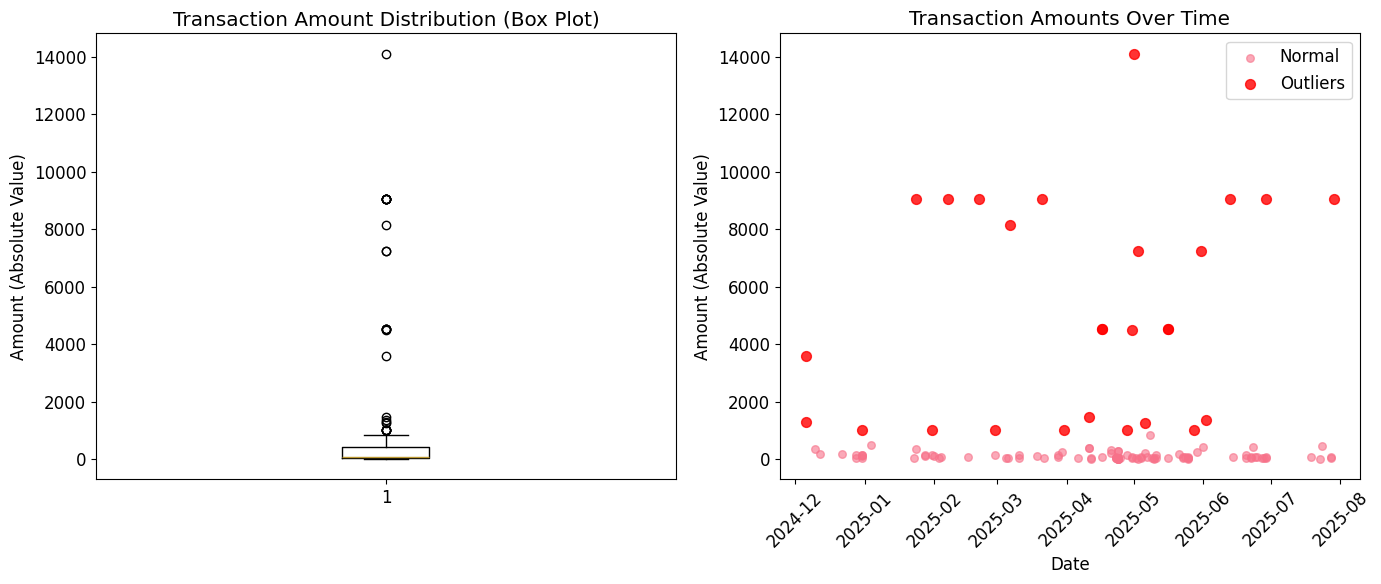

In [15]:
# Outlier detection using IQR method
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Detect outliers for absolute amounts
amount_abs = df['Amount'].abs()
outliers = detect_outliers_iqr(amount_abs)
outlier_transactions = df[df['Amount'].abs().isin(outliers)]

print(f"Number of outlier transactions: {len(outlier_transactions)}")
print(f"Percentage of outliers: {len(outlier_transactions)/len(df)*100:.1f}%")
print("\nOutlier transactions:")
print(outlier_transactions[['Date', 'Type', 'Description', 'Amount', 'Category']].sort_values('Amount', key=abs, ascending=False))

# Visualize outliers
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot showing outliers
axes[0].boxplot(amount_abs, vert=True)
axes[0].set_title('Transaction Amount Distribution (Box Plot)')
axes[0].set_ylabel('Amount (Absolute Value)')

# Scatter plot of amounts over time with outliers highlighted
normal_transactions = df[~df['Amount'].abs().isin(outliers)]
axes[1].scatter(normal_transactions['Date'], normal_transactions['Amount'].abs(), alpha=0.6, label='Normal', s=30)
axes[1].scatter(outlier_transactions['Date'], outlier_transactions['Amount'].abs(), 
                color='red', alpha=0.8, label='Outliers', s=50)
axes[1].set_title('Transaction Amounts Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Amount (Absolute Value)')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 9. Correlation Analysis

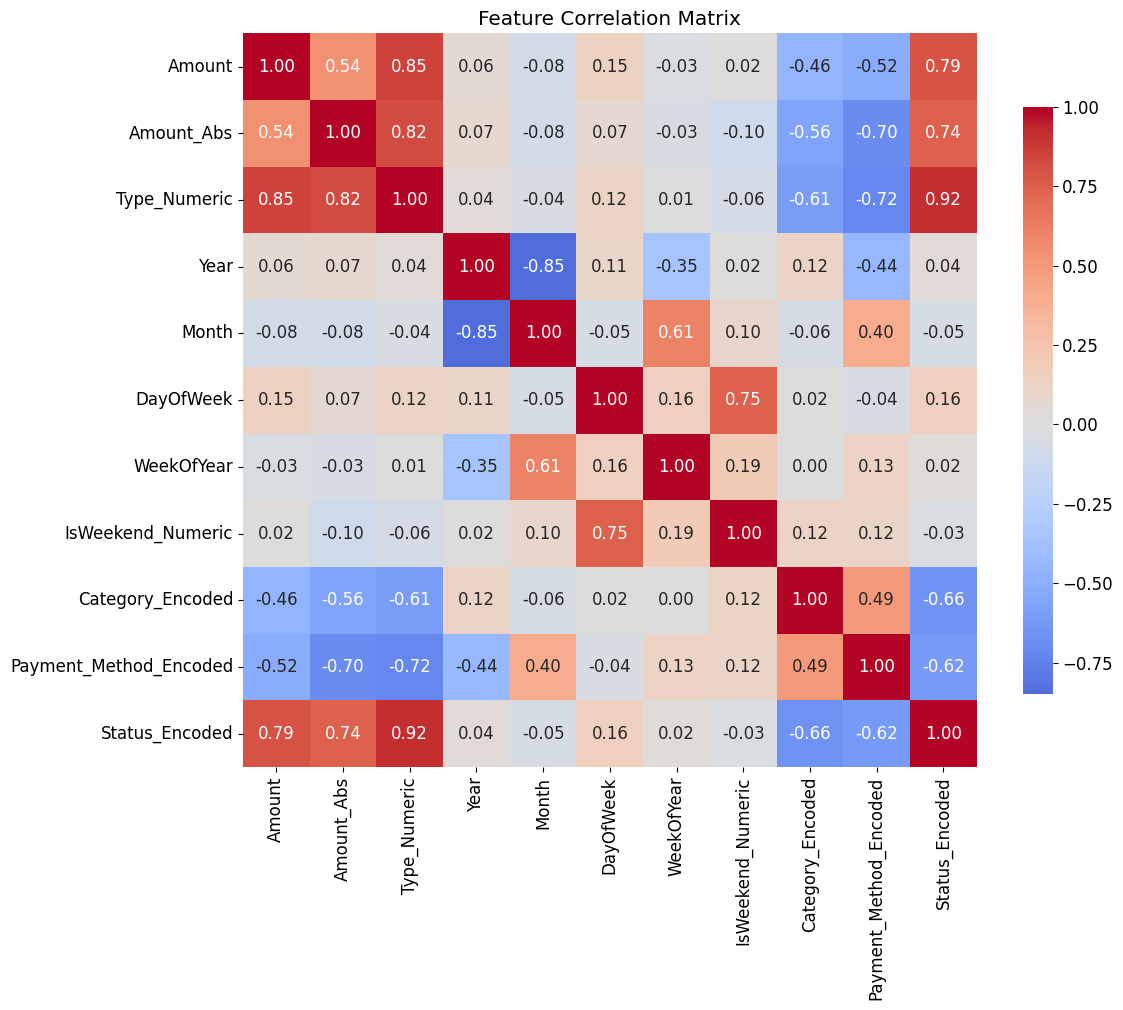

Strong correlations (|correlation| > 0.3):
Type_Numeric <-> Status_Encoded: 0.917
Amount <-> Type_Numeric: 0.850
Year <-> Month: -0.847
Amount_Abs <-> Type_Numeric: 0.824
Amount <-> Status_Encoded: 0.792
DayOfWeek <-> IsWeekend_Numeric: 0.747
Amount_Abs <-> Status_Encoded: 0.743
Type_Numeric <-> Payment_Method_Encoded: -0.723
Amount_Abs <-> Payment_Method_Encoded: -0.696
Category_Encoded <-> Status_Encoded: -0.659
Payment_Method_Encoded <-> Status_Encoded: -0.617
Month <-> WeekOfYear: 0.610
Type_Numeric <-> Category_Encoded: -0.609
Amount_Abs <-> Category_Encoded: -0.565
Amount <-> Amount_Abs: 0.541
Amount <-> Payment_Method_Encoded: -0.522
Category_Encoded <-> Payment_Method_Encoded: 0.490
Amount <-> Category_Encoded: -0.459
Year <-> Payment_Method_Encoded: -0.441
Month <-> Payment_Method_Encoded: 0.402
Year <-> WeekOfYear: -0.352


In [16]:
# Create numerical features for correlation analysis
df_numeric = df.copy()
df_numeric['Amount_Abs'] = df_numeric['Amount'].abs()
df_numeric['Type_Numeric'] = (df_numeric['Type'] == 'Income').astype(int)
df_numeric['IsWeekend_Numeric'] = df_numeric['IsWeekend'].astype(int)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le_category = LabelEncoder()
le_payment = LabelEncoder()
le_status = LabelEncoder()

df_numeric['Category_Encoded'] = le_category.fit_transform(df_numeric['Category'].fillna('Unknown'))
df_numeric['Payment_Method_Encoded'] = le_payment.fit_transform(df_numeric['Payment Method'].fillna('Unknown'))
df_numeric['Status_Encoded'] = le_status.fit_transform(df_numeric['Status'].fillna('Unknown'))

# Select numeric columns for correlation
numeric_cols = ['Amount', 'Amount_Abs', 'Type_Numeric', 'Year', 'Month', 'DayOfWeek', 
                'WeekOfYear', 'IsWeekend_Numeric', 'Category_Encoded', 
                'Payment_Method_Encoded', 'Status_Encoded']

correlation_matrix = df_numeric[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Display strong correlations
print("Strong correlations (|correlation| > 0.3):")
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            correlation_pairs.append((correlation_matrix.columns[i], 
                                    correlation_matrix.columns[j], corr_val))

for pair in sorted(correlation_pairs, key=lambda x: abs(x[2]), reverse=True):
    print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.3f}")

## 10. Key Insights and Summary

In [17]:
# Generate comprehensive summary
print("=" * 50)
print("DATASET SUMMARY & KEY INSIGHTS")
print("=" * 50)

print(f"\n📊 DATASET OVERVIEW:")
print(f"• Total Transactions: {len(df):,}")
print(f"• Date Range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"• Duration: {(df['Date'].max() - df['Date'].min()).days} days")
print(f"• Income Transactions: {len(income_df)} ({len(income_df)/len(df)*100:.1f}%)")
print(f"• Expense Transactions: {len(expense_df)} ({len(expense_df)/len(df)*100:.1f}%)")

print(f"\n💰 FINANCIAL OVERVIEW:")
total_income = income_df['Amount'].sum()
total_expenses = expense_df['Amount'].sum()
net_amount = total_income + total_expenses
print(f"• Total Income: ${total_income:,.2f}")
print(f"• Total Expenses: ${abs(total_expenses):,.2f}")
print(f"• Net Amount: ${net_amount:,.2f}")
print(f"• Average Transaction: ${df['Amount'].mean():.2f}")
print(f"• Average Income: ${income_df['Amount'].mean():.2f}")
print(f"• Average Expense: ${expense_df['Amount'].abs().mean():.2f}")

print(f"\n🏷️ CATEGORY INSIGHTS:")
print(f"• Unique Categories: {df['Category'].nunique()}")
print(f"• Most Common Category: {df['Category'].mode().iloc[0]} ({df['Category'].value_counts().iloc[0]} transactions)")
top_expense_cat = expense_df.groupby('Category')['Amount'].sum().abs().idxmax()
top_expense_amt = expense_df.groupby('Category')['Amount'].sum().abs().max()
print(f"• Highest Expense Category: {top_expense_cat} (${top_expense_amt:,.2f})")

print(f"\n💳 PAYMENT METHODS:")
print(f"• Unique Payment Methods: {df['Payment Method'].nunique()}")
print(f"• Most Used: {df['Payment Method'].mode().iloc[0]} ({df['Payment Method'].value_counts().iloc[0]} transactions)")

print(f"\n📅 TEMPORAL PATTERNS:")
avg_transactions_per_day = len(df) / (df['Date'].max() - df['Date'].min()).days
print(f"• Average Transactions/Day: {avg_transactions_per_day:.2f}")
busiest_dow = day_names[df['DayOfWeek'].mode().iloc[0]]
print(f"• Busiest Day of Week: {busiest_dow}")
weekend_pct = df['IsWeekend'].sum() / len(df) * 100
print(f"• Weekend Transactions: {weekend_pct:.1f}%")

print(f"\n⚠️ DATA QUALITY:")
print(f"• Missing Values: {df.isnull().sum().sum()} total")
print(f"• Duplicate Transactions: {df.duplicated().sum()}")
print(f"• Outlier Transactions: {len(outlier_transactions)} ({len(outlier_transactions)/len(df)*100:.1f}%)")
print(f"• Pending Transactions: {(df['Status'] == 'pending').sum()}")

print(f"\n🎯 MODELING RECOMMENDATIONS:")
print("• Primary Target Variables: Category, Amount, Status")
print("• Key Features: Date components, Amount patterns, Historical features")
print("• Suggested Models: RandomForest, XGBoost, LSTM for time series")
print("• Data Split Strategy: Time-based (chronological) for temporal patterns")
print("• Feature Engineering: Rolling statistics, lag features, seasonal components")

print("\n" + "="*50)
print("End of Exploratory Data Analysis")
print("="*50)

DATASET SUMMARY & KEY INSIGHTS

📊 DATASET OVERVIEW:
• Total Transactions: 124
• Date Range: 2024-12-06 to 2025-07-29
• Duration: 235 days
• Income Transactions: 15 (12.1%)
• Expense Transactions: 109 (87.9%)

💰 FINANCIAL OVERVIEW:
• Total Income: $107,527.18
• Total Expenses: $40,627.47
• Net Amount: $66,899.71
• Average Transaction: $539.51
• Average Income: $7168.48
• Average Expense: $372.73

🏷️ CATEGORY INSIGHTS:
• Unique Categories: 22
• Most Common Category: travel (34 transactions)
• Highest Expense Category: other ($14,115.00)

💳 PAYMENT METHODS:
• Unique Payment Methods: 4
• Most Used: credit_card (45 transactions)

📅 TEMPORAL PATTERNS:
• Average Transactions/Day: 0.53
• Busiest Day of Week: Fri
• Weekend Transactions: 27.4%

⚠️ DATA QUALITY:
• Missing Values: 95 total
• Duplicate Transactions: 0
• Outlier Transactions: 27 (21.8%)
• Pending Transactions: 10

🎯 MODELING RECOMMENDATIONS:
• Primary Target Variables: Category, Amount, Status
• Key Features: Date components, Amount

In [18]:
# Save processed data for next steps
df_processed = df.copy()
df_processed.to_csv('../../data/processed_transactions.csv', index=False)
print("Processed data saved to: data/processed_transactions.csv")

# Save key statistics for reference
summary_stats = {
    'total_transactions': len(df),
    'date_range': f"{df['Date'].min()} to {df['Date'].max()}",
    'total_income': float(total_income),
    'total_expenses': float(abs(total_expenses)),
    'net_amount': float(net_amount),
    'unique_categories': int(df['Category'].nunique()),
    'outlier_count': len(outlier_transactions),
    'missing_values': int(df.isnull().sum().sum())
}

import json
with open('../../data/summary_statistics.json', 'w') as f:
    json.dump(summary_stats, f, indent=2, default=str)
print("Summary statistics saved to: data/summary_statistics.json")

Processed data saved to: data/processed_transactions.csv
Summary statistics saved to: data/summary_statistics.json
